# NLP Data Processing

This part can be challenging, this first thing is that they are a lot of different words and some can be useless for our machine learning algortihm. The other thing is that with the data imported from the web scraping the words can be slightly different, so they won't match with our data set.

## I) Text Normalization

For the first step, we import the data and keep only the features of interest. They are many features in the dataset that we won't use and the values 'Sauces condimentaires_RHF' and 'Bouillons et potages_RHF' are old data we should remove.

We can see on the DataFrame that they are 4 features.
The feature called Ingrédient contains too many informations, we want to have a clean "Ingrédient" without too many possibilities in order to match easily with the data from the web-scraping.
1. We will delete every ingredients after the ":" which describes us the composition of this ingredient. We can give one exemple with "chocolat noir : masse de cacao, sucre, emulsifiant : lecithine de soja"
We will do this for 3 reasons, the first one is that some data from the web-scraping won't put every detail about the ingredient but just "chocolat noir" because the data from Oqali are really precise. The second is that they are not the main composition of the product, they are just a part of an ingredient, we can suppose that in the majority their % in the product is really low. Finally we tested different classification with them and without them and the result where almost the same.
+ add that they will introduce the unicity of the ingredient
+ they are "conservateur", "epaississant", ect ... not really important and they composition can vary from a brand to another
+ new shop don't take them into account, won't work
+ difficult to automate this
+ underfitting, over fitting
2. We will delete every ingredients that are in "()" for the same reasons as ":"
3. To see if the data is clean and for the rest of the study we will remplace every " " with "_"
4. We drop every rows that contain an ingredient which is unique in the data

In [66]:
import pandas as pd
import numpy as np

df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\data_preparation\data_oqali\merged.csv', low_memory=False, sep=',')
df = df[["Code_produit", "Secteur", "Famille", "Ingrédient"]]
#df = df[~df['Secteur'].isin(['Sauces condimentaires_RHF', 'Bouillons et potages_RHF'])]
df

,Code_produit,Secteur,Famille,Ingrédient
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,lait ecreme reconstitue
1,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,sucre
2,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,fruit : framboise
3,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,creme
4,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,"epaississants : amidon transforme de mais, gom..."
...,...,...,...,...
1787178,101536,Sirops et boissons concentrees a diluer,Sirops,Ambiant
1787179,101537,Sirops et boissons concentrees a diluer,Sirops,Ambiant
1787180,101540,Sirops et boissons concentrees a diluer,Sirops,Ambiant
1787181,101542,Sirops et boissons concentrees a diluer,Sirops,Ambiant


In [13]:
a = sorted(df["Code_produit"].unique())
b = sorted(df["Secteur"].unique(), key=str.lower)
c = sorted(df["Famille"].unique(), key=str.lower)
d = sorted(df["Ingrédient"].unique(), key=str.lower)
e = df.Ingrédient[df.Ingrédient.str.contains(":")]
f = df.Ingrédient[df.Ingrédient.str.contains("\(")]
print(a[0:10], b[0:10], c[0:10], d[0:10])

[450, 453, 455, 456, 460, 463, 464, 468, 473, 474] ['Aliments infantiles de diversification', 'Aperitifs a croquer', 'Barres cerealieres', 'Biscuits et gateaux industriels', 'Boissons Rafraichissantes Sans Alcool', 'Bouillons et potages', 'Cereales pour le petit dejeuner', 'Charcuterie', 'Chocolat et produits chocolates', 'Compotes'] ['Arachides et graines', 'Assortiment de glaces', 'Assortiments', 'Assortiments de chocolats', 'Assortiments de confiseries', 'Assortiments de mignardises', 'Assortiments de snacking', 'Aumonieres aperitives', 'Autre fromage a pate persillee', 'Autre fromage a pate pressee cuite'] [' AMANDES NOUGAT', ' BRIOCHE TRESSEE MOELLEUSE TOUT CHOCOLAT', ' emulsifiants : e322 de soja, e433, e470a', ' fourrage creme patissiere : eau, sucre, lactose et proteines de lait, matiere grasse vegetale, amidon de mais, amidon modifie, dextrose, gelifiants (e401, e450, e516), epaississant (e415), aromes, conservateur (e200), colorant (e160a)', ' LE CHINOIS BRIOCHE FOURREE A LA 

In [67]:
def remove_colon(list):
    n = len(list)
    i = 1
    colonfree = list[0]
    while i < n and list[i] != ":":
        colonfree = colonfree + " " + list[i]
        i = i + 1
    return colonfree

df.Ingrédient[df.Ingrédient.str.contains(":")] = df[df.Ingrédient.str.contains(":")].Ingrédient.str.split().map(lambda x:remove_colon(x))

df.Ingrédient[df.Ingrédient.str.contains("\(")] = df[df.Ingrédient.str.contains("\(")].Ingrédient.str.replace(r"\s\(.*\)", "", regex=True)
df.Ingrédient[df.Ingrédient.str.contains("\(")] = df[df.Ingrédient.str.contains("\(")].Ingrédient.str.replace(r"\s\(.*\)\s", " ", regex=True)
df.Ingrédient[df.Ingrédient.str.contains("\(")] = df[df.Ingrédient.str.contains("\(")].Ingrédient.str.replace(r"\(.*\)", "", regex=True)
df.Ingrédient[df.Ingrédient.str.contains("\(")] = df[df.Ingrédient.str.contains("\(")].Ingrédient.str.replace(r"\(.*", "", regex=True)
df.Ingrédient = df["Ingrédient"].apply(lambda x: x.rstrip())
df.Ingrédient = df["Ingrédient"].apply(lambda x: x.lstrip())
df = df[df.duplicated(subset=['Ingrédient'], keep=False)]
df['Ingrédient'] = df['Ingrédient'].apply(lambda x : x.replace('_',' '))
df['Ingrédient'] = df['Ingrédient'].apply(lambda x : x.replace('*',' '))
df

C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_3904\4051542450.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Ingrédient[df.Ingrédient.str.contains("\(")] = df[df.Ingrédient.str.contains("\(")].Ingrédient.str.replace(r"\s\(.*\)", "", regex=True)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_3904\4051542450.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.Ingrédient[df.Ingrédient.str.contains("\(")] = df[df.Ingrédient.str.contains("\(")].Ingrédient.str.replace(r"\s\(.*\)\s", " ", regex=True)
C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_3904\4051542450.py:14: SettingWithCopyWarning: 
A v

,Code_produit,Secteur,Famille,Ingrédient
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,lait ecreme reconstitue
1,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,sucre
2,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,fruit
3,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,creme
4,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,epaississants
...,...,...,...,...
1787178,101536,Sirops et boissons concentrees a diluer,Sirops,Ambiant
1787179,101537,Sirops et boissons concentrees a diluer,Sirops,Ambiant
1787180,101540,Sirops et boissons concentrees a diluer,Sirops,Ambiant
1787181,101542,Sirops et boissons concentrees a diluer,Sirops,Ambiant


## Punctuation Removal 

In this step, all the punctuations from the text are removed. string library of Python contains some pre-defined list of punctuations such as ‘!”#$%&'()*+,-./:;?@[\]^_`{|}~’

In [68]:
#library that contains punctuation
import string
string.punctuation
string.punctuation = string.punctuation + '1234567890'
list_punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~1234567890'
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in list_punctuation])
    return punctuationfree

#storing the puntuation free text
df['clean_msg']= df['Ingrédient'].apply(lambda x:remove_punctuation(x))
df.head()

C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_3904\441487190.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['clean_msg']= df['Ingrédient'].apply(lambda x:remove_punctuation(x))


,Code_produit,Secteur,Famille,Ingrédient,clean_msg
0,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,lait ecreme reconstitue,lait ecreme reconstitue
1,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,sucre,sucre
2,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,fruit,fruit
3,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,creme,creme
4,450,Produits laitiers et desserts frais,Yaourts et laits fermentes sucres classiques,epaississants,epaississants


## Change Case

Changing the case involves converting all text to lowercase or uppercase so that all word strings follow a consistent format. Lowercasing is the more frequent choice in NLP software.

It is one of the most common text preprocessing Python steps where the text is converted into the same case preferably lower case. But it is not necessary to do this step every time you are working on an NLP problem as for some problems lower casing can lead to loss of information.

For example, if in any project we are dealing with the emotions of a person, then the words written in upper cases can be a sign of frustration or excitement.

In [69]:
df['msg_lower']= df['clean_msg'].apply(lambda x: x.lower())
df = df.groupby(['Code_produit', 'Secteur'])['msg_lower'].agg(lambda col: ' '.join(col)).reset_index(name='msg_lower')
df.head()

C:\Users\Thomas Aujoux\AppData\Local\Temp\ipykernel_3904\223935884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['msg_lower']= df['clean_msg'].apply(lambda x: x.lower())


,Code_produit,Secteur,msg_lower
0,450,Produits laitiers et desserts frais,lait ecreme reconstitue sucre fruit creme epai...
1,453,Produits laitiers et desserts frais,yaourt au lait partiellement ecreme sucre siro...
2,455,Produits laitiers et desserts frais,yaourt au lait mg sucre fruits fruit fruit fr...
3,456,Produits laitiers et desserts frais,yaourt au lait mg sucre fraise fructose conce...
4,460,Produits laitiers et desserts frais,lait ecreme pasteurise creme pasteurisee ferme...


## Tokenization

The tokenization stage involves converting a sentence into a stream of words, also called “tokens.” Tokens are the basic building blocks upon which analysis and other methods are built. 

Many NLP toolkits allow users to input multiple criteria based on which word boundaries are determined. For example, you can use a whitespace or punctuation to determine if one word has ended and the next one has started. Again, in some instances, these rules might fail. For example, don’t, it’s, etc. are words themselves that contain punctuation marks and have to be dealt with separately.

In this step, the text is split into smaller units. We can use either sentence tokenization or word tokenization based on our problem statement.

In [70]:
#defining function for tokenization
import re
def tokenization(text):
    tokens = text.split(sep = ' ')
    return tokens
#applying function to the column
df['msg_tokenied']= df['msg_lower'].apply(lambda x: tokenization(x))

In [87]:
df.head()

,Code_produit,Secteur,msg_lower,msg_tokenied
0,450,Produits laitiers et desserts frais,lait ecreme reconstitue sucre fruit creme epai...,"[lait, ecreme, reconstitue, sucre, fruit, crem..."
1,453,Produits laitiers et desserts frais,yaourt au lait partiellement ecreme sucre siro...,"[yaourt, au, lait, partiellement, ecreme, sucr..."
2,455,Produits laitiers et desserts frais,yaourt au lait mg sucre fruits fruit fruit fr...,"[yaourt, au, lait, , mg, sucre, fruits, fruit,..."
3,456,Produits laitiers et desserts frais,yaourt au lait mg sucre fraise fructose conce...,"[yaourt, au, lait, , mg, sucre, fraise, fructo..."
4,460,Produits laitiers et desserts frais,lait ecreme pasteurise creme pasteurisee ferme...,"[lait, ecreme, pasteurise, creme, pasteurisee,..."


## Stop-Words Removal

"Stop words" are frequently occurring words used to construct sentences. In the English language, stop words include is, the, are, of, in, and and. For some NLP applications, such as document categorization, sentiment analysis, and spam filtering, these words are redundant, and so are removed at the preprocessing stage. 

Stopwords are the commonly used words and are removed from the text as they do not add any value to the analysis. These words carry less or no meaning.

NLTK library consists of a list of words that are considered stopwords for the English language. Some of them are : [i, me, my, myself, we, our, ours, ourselves, you, you’re, you’ve, you’ll, you’d, your, yours, yourself, yourselves, he, most, other, some, such, no, nor, not, only, own, same, so, then, too, very, s, t, can, will, just, don, don’t, should, should’ve, now, d, ll, m, o, re, ve, y, ain, aren’t, could, couldn’t, didn’t, didn’t]

But it is not necessary to use the provided list as stopwords as they should be chosen wisely based on the project. For example, ‘How’ can be a stop word for a model but can be important for some other problem where we are working on the queries of the customers. We can create a customized list of stop words for different problems.

In [71]:
#importing nlp library
import nltk
#Stop words present in the library
stopwords = nltk.corpus.stopwords.words('french')
stopwords.append("a")
stopwords.append("mg")
stopwords

['au',
 'aux',
 'avec',
 'ce',
 'ces',
 'dans',
 'de',
 'des',
 'du',
 'elle',
 'en',
 'et',
 'eux',
 'il',
 'ils',
 'je',
 'la',
 'le',
 'les',
 'leur',
 'lui',
 'ma',
 'mais',
 'me',
 'même',
 'mes',
 'moi',
 'mon',
 'ne',
 'nos',
 'notre',
 'nous',
 'on',
 'ou',
 'par',
 'pas',
 'pour',
 'qu',
 'que',
 'qui',
 'sa',
 'se',
 'ses',
 'son',
 'sur',
 'ta',
 'te',
 'tes',
 'toi',
 'ton',
 'tu',
 'un',
 'une',
 'vos',
 'votre',
 'vous',
 'c',
 'd',
 'j',
 'l',
 'à',
 'm',
 'n',
 's',
 't',
 'y',
 'été',
 'étée',
 'étées',
 'étés',
 'étant',
 'étante',
 'étants',
 'étantes',
 'suis',
 'es',
 'est',
 'sommes',
 'êtes',
 'sont',
 'serai',
 'seras',
 'sera',
 'serons',
 'serez',
 'seront',
 'serais',
 'serait',
 'serions',
 'seriez',
 'seraient',
 'étais',
 'était',
 'étions',
 'étiez',
 'étaient',
 'fus',
 'fut',
 'fûmes',
 'fûtes',
 'furent',
 'sois',
 'soit',
 'soyons',
 'soyez',
 'soient',
 'fusse',
 'fusses',
 'fût',
 'fussions',
 'fussiez',
 'fussent',
 'ayant',
 'ayante',
 'ayantes',


In [72]:


#defining the function to remove stopwords from tokenized text
def remove_stopwords(text):
    output= [i for i in text if i not in stopwords]
    return output

#applying the function
df['no_stopwords']= df['msg_tokenied'].apply(lambda x:remove_stopwords(x))
df = df[["Code_produit","Secteur", "no_stopwords"]]

## Stemming

It is also known as the text standardization step where the words are stemmed or diminished to their root/base form.  For example, words like ‘programmer’, ‘programming, ‘program’ will be stemmed to ‘program’.

But the disadvantage of stemming is that it stems the words such that its root form loses the meaning or it is not diminished to a proper English word. We will see this in the steps done below.

## Lemmatization 

Lemmatization is a more advanced form of stemming and involves converting all words to their corresponding root form, called “lemma.” While stemming reduces all words to their stem via a lookup table, it does not employ any knowledge of the parts of speech or the context of the word. This means stemming can’t distinguish which meaning of the word right is intended in the sentences “Please turn right at the next light” and “She is always right.”

The stemmer would stem right to right in both sentences; the lemmatizer would treat right differently based upon its usage in the two phrases. 

A lemmatizer also converts different word forms or inflections to a standard form. For example, it would convert less to little, wrote to write, slept to sleep, etc. 

A lemmatizer works with more rules of the language and contextual information than does a stemmer. It also relies on a dictionary to look up matching words. Because of that, it requires more processing power and time than a stemmer to generate output. For these reasons, some NLP applications only use a stemmer and not a lemmatizer. 

It stems the word but makes sure that it does not lose its meaning.  Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing.

The difference between Stemming and Lemmatization can be understood with the example provided below.

In [42]:
import nltk
import string
from french_lefff_lemmatizer.french_lefff_lemmatizer import FrenchLefffLemmatizer

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to C:\Users\Thomas
[nltk_data]     Aujoux\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\Thomas
[nltk_data]     Aujoux\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Thomas
[nltk_data]     Aujoux\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [43]:

lemmatizer = FrenchLefffLemmatizer()

def preprocess_text(df):
    a = len(df)
    for i in range(len(df)):
        for j in range(len(df.iloc[i, 2])):
            df.iloc[i, 2][j] = lemmatizer.lemmatize(df.iloc[i, 2][j])
            if len(df.iloc[i, 2][j])<=2 :
                df.iloc[i, 2][j] = ""
            if len(df.iloc[i, 2][j])>3 and df.iloc[i, 2][j][-3 :] == "ees":
                df.iloc[i, 2][j] = df.iloc[i, 2][j][:-2]
            if len(df.iloc[i, 2][j])>3 and df.iloc[i, 2][j][-1] == "s":
                df.iloc[i, 2][j] = df.iloc[i, 2][j][:-1]
            if len(df.iloc[i, 2][j])>3 and df.iloc[i, 2][j][-2 :] == "ee":
                df.iloc[i, 2][j] = df.iloc[i, 2][j][:-1]
    return df

preprocess_text(df)


,Code_produit,Secteur,no_stopwords
0,450,Produits laitiers et desserts frais,"[lait, ecreme, reconstitue, sucre, fruit, crem..."
1,453,Produits laitiers et desserts frais,"[yaourt, lait, partiellement, ecreme, sucre, s..."
2,455,Produits laitiers et desserts frais,"[yaourt, lait, , sucre, fruit, fruit, fruit, f..."
3,456,Produits laitiers et desserts frais,"[yaourt, lait, , sucre, fraise, fructose, conc..."
4,460,Produits laitiers et desserts frais,"[lait, ecreme, pasteurise, creme, pasteurise, ..."
...,...,...,...
66503,101536,Sirops et boissons concentrees a diluer,"[sucre, eau, jus, orange, base, concentre, aci..."
66504,101537,Sirops et boissons concentrees a diluer,"[sucre, eau, jus, fruit, base, concentre, jus,..."
66505,101540,Sirops et boissons concentrees a diluer,"[sucre, eau, jus, peche, base, concentre, acid..."
66506,101542,Sirops et boissons concentrees a diluer,"[sirop, glucose, fructose, eau, sucre, liquide..."


In [74]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer(language='french')


def preprocess_text_stemm(df):
    a = len(df)
    for i in range(len(df)):
        for j in range(len(df.iloc[i, 2])):
            df.iloc[i, 2][j] = stemmer.stem(df.iloc[i, 2][j])
        while("" in df.iloc[i, 2]):
            df.iloc[i, 2].remove("")

    return df

df = preprocess_text_stemm(df)

In [ ]:
stemmer.stem("journées")

'journ'

In [115]:
df

,Code_produit,Secteur,no_stopwords
0,450,Produits laitiers et desserts frais,"[lait, ecrem, reconstitu, sucr, fruit, crem, e..."
1,453,Produits laitiers et desserts frais,"[yaourt, lait, partiel, ecrem, sucr, sirop, gl..."
2,455,Produits laitiers et desserts frais,"[yaourt, lait, , sucr, fruit, fruit, fruit, fr..."
3,456,Produits laitiers et desserts frais,"[yaourt, lait, , sucr, frais, fructos, concent..."
4,460,Produits laitiers et desserts frais,"[lait, ecrem, pasteuris, crem, pasteurise, fer..."
...,...,...,...
66503,101536,Sirops et boissons concentrees a diluer,"[sucr, eau, jus, orang, bas, concentr, acidifi..."
66504,101537,Sirops et boissons concentrees a diluer,"[sucr, eau, jus, fruit, bas, concentr, jus, or..."
66505,101540,Sirops et boissons concentrees a diluer,"[sucr, eau, jus, pech, bas, concentr, acidifi,..."
66506,101542,Sirops et boissons concentrees a diluer,"[sirop, glucos, fructos, eau, sucr, liquid, ju..."


In [47]:
df.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\data_preparation\data_clean\clean_for_stat.csv')

## Vectorisation

In [44]:
df = df[["Code_produit", "Secteur", "no_stopwords"]]


from sklearn.feature_extraction.text import CountVectorizer
coun_vect = CountVectorizer(analyzer=lambda x: x)
count_matrix = coun_vect.fit_transform(df["no_stopwords"])
count_array = count_matrix.toarray()
df_vect = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
new_df = pd.concat([df[["Code_produit", "Secteur"]], df_vect], axis=1)
new_df = new_df.drop('', axis=1)

In [45]:
z = new_df.columns.values

In [ ]:
new_df.to_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\data_preparation\data_clean\clean.csv')

## N-gram

In [190]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(smooth_idf=True,
                             max_features = 3000,
                             ngram_range = (1,3),
                             token_pattern='(?u)\\b\\w\\w*\\b'                                                     
                             )

words = vectorizer.fit_transform(df.no_stopwords)

df2 = pd.DataFrame(words.todense()).rename(columns=dict(zip(vectorizer.vocabulary_.values(),
vectorizer.vocabulary_.keys())))
new_df = pd.concat([df[["Code_produit", "Secteur"]], df2], axis=1)

MemoryError: Unable to allocate 1.49 GiB for an array with shape (3000, 66508) and data type float64

In [188]:
new_df

,Code_produit,Secteur,abricot,abricot ambi,abricot bas,abricot bas concentr,abricot confitur,abricot frais,abricot pech,abricot pomm,...,yaourt maigr,yaourt natur,yaourt natur lait,yaourt natur yaourt,yaourt sucr,yaourt sucr aromatis,yopl,zero,zest,zest citron
0,450,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,453,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,455,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,456,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,460,Produits laitiers et desserts frais,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66503,101536,Sirops et boissons concentrees a diluer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66504,101537,Sirops et boissons concentrees a diluer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66505,101540,Sirops et boissons concentrees a diluer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
66506,101542,Sirops et boissons concentrees a diluer,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [177]:
t = df2.sum(axis=0).sort_values(ascending=False)

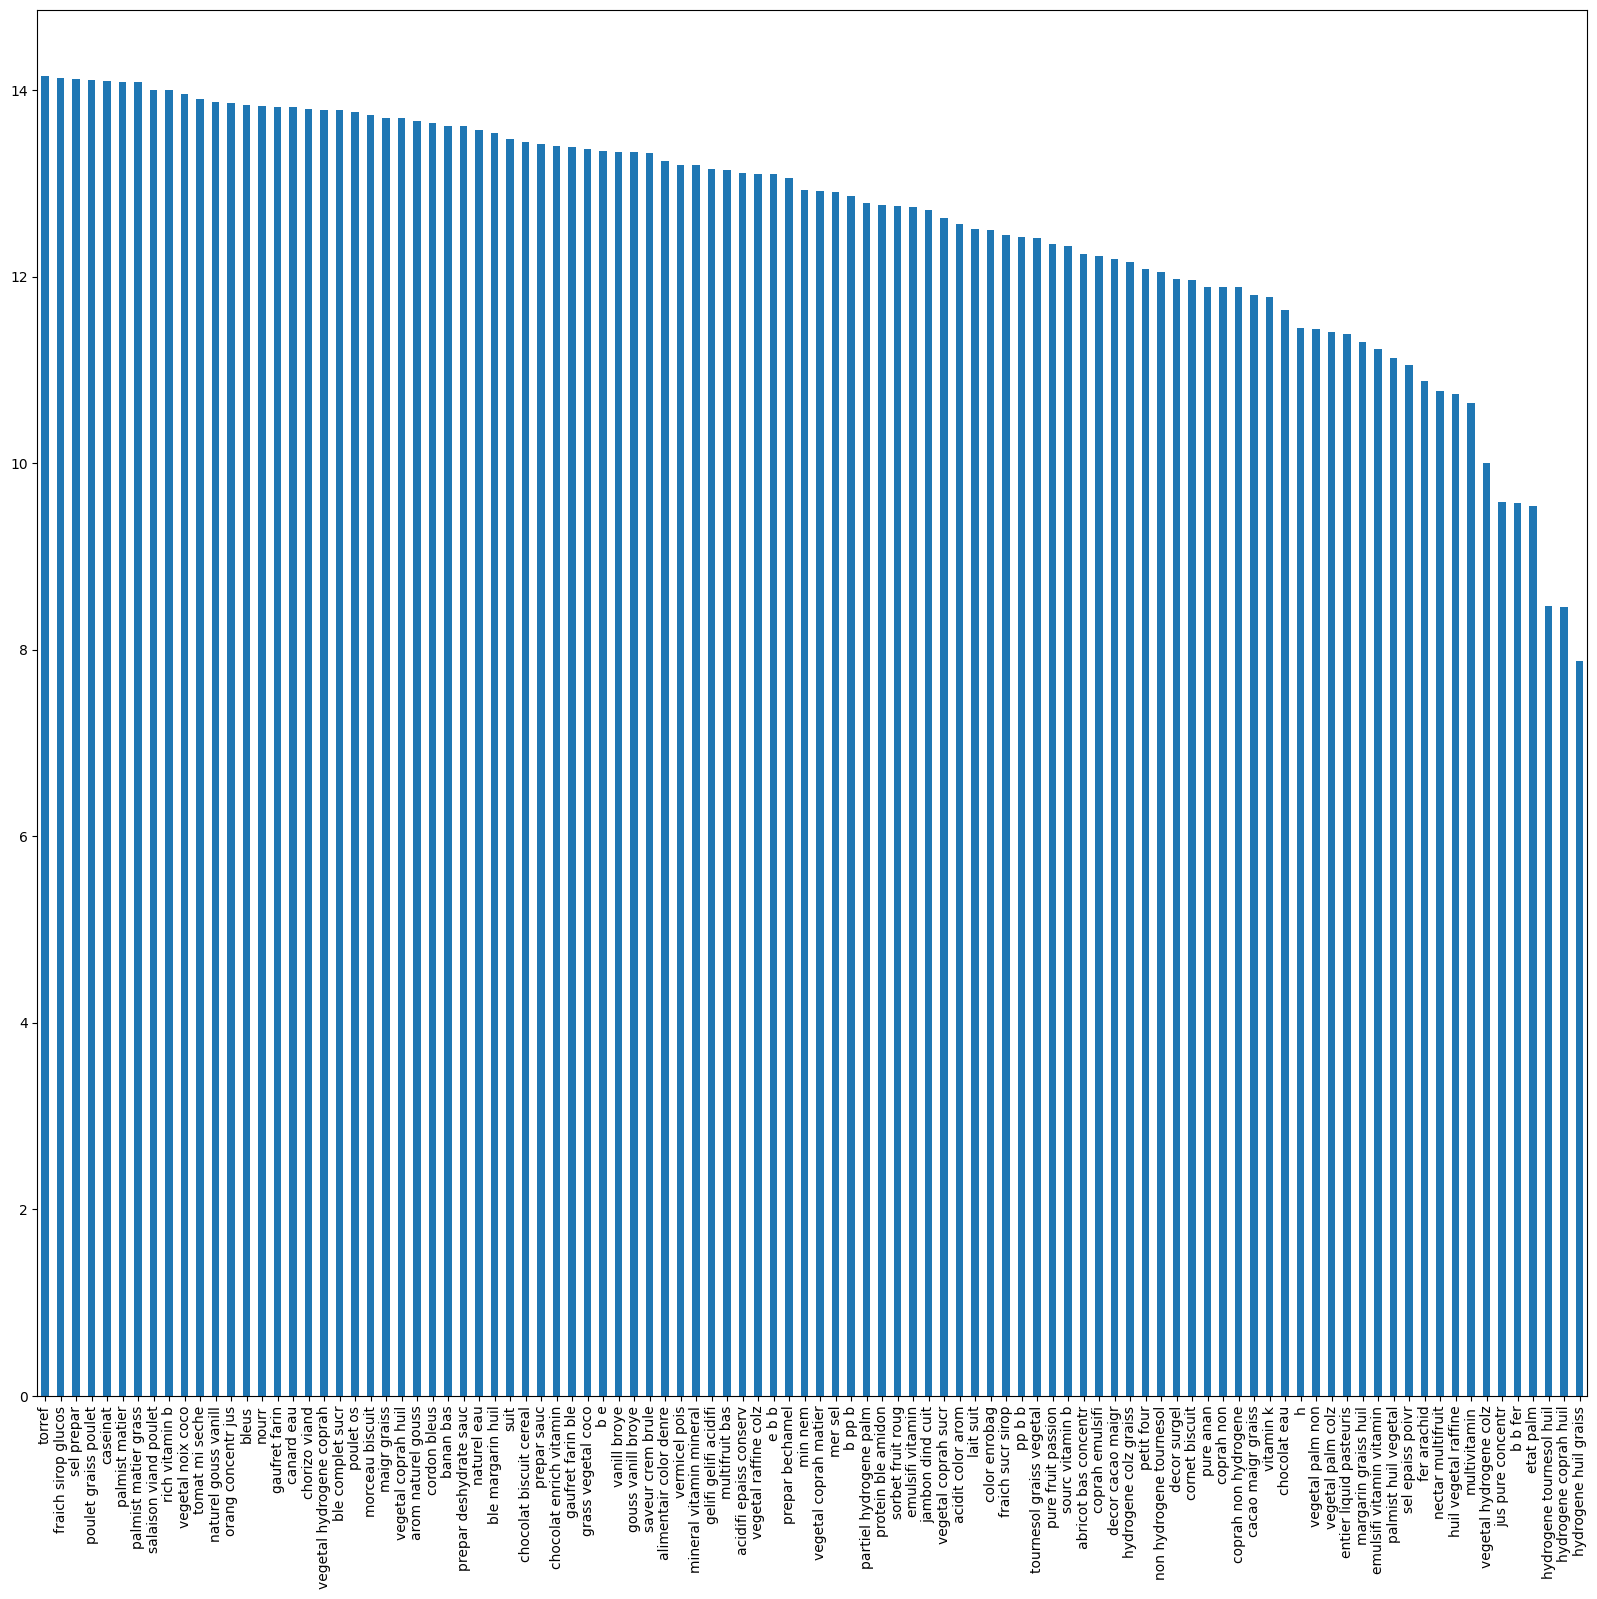

In [182]:
ax = t[5900:6000].plot( figsize=(20,18),kind = 'bar')

In [100]:
df = df[["Code_produit", "Secteur", "no_stopwords"]]
df['no_stopwords'] = [' '.join(map(str, l)) for l in df['no_stopwords']]

In [101]:
from sklearn.feature_extraction.text import CountVectorizer
coun_vect = CountVectorizer(ngram_range=(1, 1))
count_matrix = coun_vect.fit_transform(df["no_stopwords"])
count_array = count_matrix.toarray()
df_vect = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
new_df = pd.concat([df[["Code_produit", "Secteur"]], df_vect], axis=1)
#new_df = new_df.drop('', axis=1)

In [115]:
df = df[["Code_produit", "Secteur", "no_stopwords"]]


from sklearn.feature_extraction.text import CountVectorizer

coun_vect = CountVectorizer(ngram_range=(1, 3))
count_matrix = coun_vect.fit_transform(df["no_stopwords"])
count_array = count_matrix.toarray()
df_vect = pd.DataFrame(data=count_array,columns = coun_vect.get_feature_names_out())
new_df = pd.concat([df[["Code_produit", "Secteur"]], df_vect], axis=1)
#new_df = new_df.drop('', axis=1)

MemoryError: Unable to allocate 330. GiB for an array with shape (66508, 665990) and data type int64

In [113]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(ngram_range=(1, 1))
document = df["no_stopwords"]

# Don't need both X and transformer; they should be identical
X = vectorizer.fit_transform(document)
matrix_terms = np.array(vectorizer.get_feature_names_out())

# Use the axis keyword to sum over rows
matrix_freq = np.asarray(X.sum(axis=0)).ravel()
final_matrix = np.array([matrix_terms,matrix_freq])

In [116]:
final_matrix = pd.DataFrame(final_matrix)

In [105]:
vectorizer = CountVectorizer(ngram_range=(1, 1))

In [106]:
X = vectorizer.fit_transform(document)

In [107]:
X

<3x3 sparse matrix of type '<class 'numpy.int64'>'
	with 3 stored elements in Compressed Sparse Row format>

In [109]:
matrix_terms = np.array(vectorizer.get_feature_names_out())

In [102]:
z = new_df.columns.values

In [52]:
df.head()
df.iloc(["no_stopwords"])

TypeError: unhashable type: 'list'

In [81]:
(pd.Series(nltk.ngrams(df.iloc[:,2], 2)).value_counts())[:10]

([sucr, pat, cacao, beurr, cacao, cacao, maigr, poudr, emulsifi, arom, fruit, coqu, cereal, lait, cacao, noir, extra, chocolat, noir, extra, fin, noir, extra, chocolat, noir, extra, fin, ambi], [sucr, pat, cacao, beurr, cacao, cacao, maigr, poudr, emulsifi, arom, fruit, coqu, cereal, lait, cacao, noir, extra, chocolat, noir, extra, fin, noir, extra, chocolat, noir, extra, fin, ambi])                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [91]:
class NGramLM(object):

    def __init__(self, N, tokens):
        """
        Intializes an N-Gram Language Model using
        a list of tokens. It trains the language model
        using `train` and saves it to the attribute
        self.mdl
        
        Parameter(s):
            N (int): The N-Gram length to create.
            tokens (list-like object): Tokens to use to create N-Grams.
        """
        self.N = N


        ngrams = tokens
        self.mdl = self.train(ngrams)

        # If N < 2 then we can't create any NGram models
        if N < 2:
            raise Exception('N must be greater than 1')
        elif N == 2:
            # If we're generating start tokens, we only ever start with <START>
            self.prev_mdl = pd.value_counts(['<START>'], normalize=True)
        else:
            self.prev_mdl = NGramLM(N-1, tokens)

    def create_ngrams(self, tokens) -> list:
        """
        create_ngrams takes in a list of tokens and returns a list of N-Grams.
        
        Parameter(s):
            tokens (list-like object): tokens to create N-Grams from.
        """
        # Create tuples of length N from the tokens
        final_ngrams = []

        # we only iterate through len(tokens) - (N - 1) because our last NGrams must be length N
        for i in range(len(tokens)-(self.N-1)):

            # Set for more efficient lookup
            set_tokens = set(tokens[i:i+self.N])

            # Don't include token if <START> is anywhere but the beginning
            if "<START>" in set_tokens and tokens[i] != "<START>":
                continue

            # Don't include token if <STOP> is anywhere but the end
            if "<STOP>" in set_tokens and tokens[i+self.N - 1] != "<STOP>":
                continue

            final_ngrams.append(tuple(tokens[i:i+self.N]))

        return final_ngrams

    def train(self, ngrams) -> pd.DataFrame:
        """
        Trains a N-Gram language model given a list of tokens.
        The output is a dataframe with three columns (ngram, n1gram, prob).
        
        Parameter(s):
            ngrams (list): A list of ngrams of the appropriate length N.
        """

        # N-Gram counts C(w_1, ..., w_n)
        ngram_counts = pd.value_counts(ngrams)

        # (N-1)-Gram counts C(w_1, ..., w_(n-1))
        n_1_grams = [x[:self.N-1] for x in ngrams]
        n_1_gram_counts = pd.value_counts(n_1_grams)

        # Create the conditional probabilities
        probs = []
        n1_grams_col = []
        for ngram in ngram_counts.index:
            # Probability is P(1st & 2nd & ... & last item) / P(1st & 2nd & ... & last item - 1)
            # We approximate this by using the Count(1st & 2nd & ... & last item) / Count(1st & 2nd & ... & last item - 1)
            n_1_count = n_1_gram_counts[ngram[:self.N-1]]
            ngram_count = ngram_counts[ngram]
            n1_grams_col.append(ngram[:self.N-1])
            probs.append(ngram_count/n_1_count)

        # Put it all together
        return pd.DataFrame({'ngram': ngram_counts.index, 'n1gram': n1_grams_col, 'prob': probs}).sort_values('prob').reset_index(drop=True)

    def ngrams_for_graph(self) -> pd.DataFrame:
        """
        ngrams for graph returns a dataframe with three columns:
        - n1gram: the preceding words
        - next_word: the next word in the 
        - probability: the probability that the next word would occur in given the n1gram
        """
				# We can build the DataFrame using these two columns
        df = self.mdl[['ngram', 'prob']]

        # Helper function to get the tokens from the ngram
        def get_items(row):
            item = row.iloc[0]
            if len(row) == 2:
                return (item[0], item[-1])
            return (' '.join(item[:-1]), item[-1])

        new_df = df[['ngram']].apply(
            get_items, axis='columns', result_type='expand')
        new_df['prob'] = df['prob']
        new_df.columns = ['prev_word', 'next_word', 'probability']

        return new_df.sort_values(['prev_word', 'probability'])

In [92]:
df.iloc[:,2]

0        [lait, ecrem, reconstitu, sucr, fruit, crem, e...
1        [yaourt, lait, partiel, ecrem, sucr, sirop, gl...
2        [yaourt, lait, sucr, fruit, fruit, fruit, fruc...
3        [yaourt, lait, sucr, frais, fructos, concentr,...
4        [lait, ecrem, pasteuris, crem, pasteurise, fer...
                               ...                        
66503    [sucr, eau, jus, orang, bas, concentr, acidifi...
66504    [sucr, eau, jus, fruit, bas, concentr, jus, or...
66505    [sucr, eau, jus, pech, bas, concentr, acidifi,...
66506    [sirop, glucos, fructos, eau, sucr, liquid, ju...
66507    [sucr, cann, liquid, eau, arom, naturel, menth...
Name: no_stopwords, Length: 66508, dtype: object

In [93]:
allston_tokens = df[["no_stopwords"]]
bigram_model = NGramLM(2, allston_tokens)
bigram_model.ngrams_for_graph()

ValueError: could not broadcast input array from shape (66508,1) into shape (66508,)

In [90]:
df[["no_stopwords"]]

,no_stopwords
0,"[lait, ecrem, reconstitu, sucr, fruit, crem, e..."
1,"[yaourt, lait, partiel, ecrem, sucr, sirop, gl..."
2,"[yaourt, lait, sucr, fruit, fruit, fruit, fruc..."
3,"[yaourt, lait, sucr, frais, fructos, concentr,..."
4,"[lait, ecrem, pasteuris, crem, pasteurise, fer..."
...,...
66503,"[sucr, eau, jus, orang, bas, concentr, acidifi..."
66504,"[sucr, eau, jus, fruit, bas, concentr, jus, or..."
66505,"[sucr, eau, jus, pech, bas, concentr, acidifi,..."
66506,"[sirop, glucos, fructos, eau, sucr, liquid, ju..."


In [64]:
e

['lait',
 'ecreme',
 'reconstitue',
 'sucre',
 'fruit',
 'creme',
 'epaississant',
 'epaississant',
 'epaississant',
 'colorant',
 'mineraux',
 'lait',
 'jus',
 'concentre',
 'sureau',
 'arome',
 'ferment',
 'lactique',
 'yaourt',
 'vitamine',
 '',
 'vitamine',
 '',
 'vitamine',
 'gervai',
 'boire',
 'lait',
 'fermente',
 'sucre',
 'boire',
 'fruit',
 'enrichi',
 'vitamine',
 '',
 '',
 'gervai',
 'boire',
 'lait',
 'fermente',
 'sucre',
 'boire',
 'fruit',
 'enrichi',
 'vitamine',
 '',
 '',
 'frai']

In [65]:
e = df.iloc[0,2]
while("" in e):
    e.remove("")
e

['lait',
 'ecreme',
 'reconstitue',
 'sucre',
 'fruit',
 'creme',
 'epaississant',
 'epaississant',
 'epaississant',
 'colorant',
 'mineraux',
 'lait',
 'jus',
 'concentre',
 'sureau',
 'arome',
 'ferment',
 'lactique',
 'yaourt',
 'vitamine',
 'vitamine',
 'vitamine',
 'gervai',
 'boire',
 'lait',
 'fermente',
 'sucre',
 'boire',
 'fruit',
 'enrichi',
 'vitamine',
 'gervai',
 'boire',
 'lait',
 'fermente',
 'sucre',
 'boire',
 'fruit',
 'enrichi',
 'vitamine',
 'frai']

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

# ngram range for each cuisine
stemmer = PorterStemmer()
ngram_counters = {}
for key, value in cuisine_dict.items():
    rng = [len(word_tokenize(stemmer.stem(wc))) for wc, val in value.items()]  
    local_ngram_counter = Counter(rng)
    ngram_counters[key] = local_ngram_counter
    local_series = pd.Series(local_ngram_counter)
    local_series.plot(kind="bar", figsize=(10,6), title="NGram for %s cuisine" % key)  
    plt.show()

In [ ]:
# vector of ngram for each cuisine
ngram_index = {}
for key, value in ngram_counters.items():
    ngram_index[key] = dict(value)
df_ngram = pd.DataFrame.from_dict(ngram_index, orient='index')
df_ngram = df_ngram.fillna(0)
df_ngram[0:30]

In [ ]:
# getting the percentage of ngram for each cuisines
totalcount = df_ngram.sum().sum()
ngram_sum = df_ngram.sum().groupby(level=0).apply(lambda x: 100*x/float(totalcount))
ngram_sum.plot(kind="bar", title="Percentile Range of Word NGram")
ngram_sum[0:50]